# Evaluation project-6 Loan Prediction

In [46]:
import numpy as np
import pandas as pd
import sklearn
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")


## Loading the Data

In [47]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


target  column---> Loan_Status

## Understanding the Datasets:

There are 13 columns in the dataset namely

Independent Variables:

- Loan_ID --

- Gender -- 

- Married -- 

- Dependents -- 

- Education --

- Self_Employed -- 

- ApplicantIncome -- 

- CoapplicantIncome -- 

- Loan_Amount -- 

- Loan_Amount_Term --  

- Credit History --

- Property_Area --

Dependent Variable (Target Variable):

- Loan_Status


Some features are mixed data types.

Numerical, alphanumeric data within same feature

Loan_ID is the only ID or index number to data, hence we drop this column

In [84]:
df=df.drop(['Loan_ID'],axis=1)

In [49]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Checking the null values

In [50]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

## Checking unique values

In [52]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [53]:
df.loc[df['Gender']==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [54]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [55]:
df.loc[df['Married']==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [56]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [57]:
df.loc[df['Dependents']==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [58]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [59]:
df.loc[df['Self_Employed']==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [60]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [61]:
df.loc[df['LoanAmount']==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [62]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [63]:
df.loc[df['Loan_Amount_Term']==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [64]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [65]:
df.loc[df['Credit_History']==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Handling the Nan values and replacing it with mean of the column. As the column is countinous in nature.

In [66]:

df['LoanAmount']=df['LoanAmount'].fillna(np.mean(df['LoanAmount']))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))
df['Credit_History']=df['Credit_History'].fillna(np.mean(df['Credit_History']))

## First Encoding the data and then replce the nan values with mean

In [67]:
lencoder=LabelEncoder()
df['Gender']=lencoder.fit_transform(df['Gender'])
df['Married']=lencoder.fit_transform(df['Married'])
df['Self_Employed']=lencoder.fit_transform(df['Self_Employed'])

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,1,1,3+,Graduate,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [68]:
df['Gender']=df['Gender'].fillna(np.mean(df['Gender']))
df['Married']=df['Married'].fillna(np.mean(df['Married']))
df['Self_Employed']=df['Self_Employed'].fillna(np.mean(df['Self_Employed']))

In [69]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents            object
Education             object
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [70]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
df['Dependents']=lencoder.fit_transform(df['Dependents'])

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,1,1,3,Graduate,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [72]:
df['Dependents']=df['Dependents'].fillna(np.mean(df['Dependents']))

In [73]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Now no null values in dataset

## Data Visualization

for Categorical Features we will use count plot it will give frequecy of the classes 

Gender	Married	  Dependents	Education	Self_Employed	Loan_Amount_Term	Property_Area	Loan_Status

1    489
0    112
2     13
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

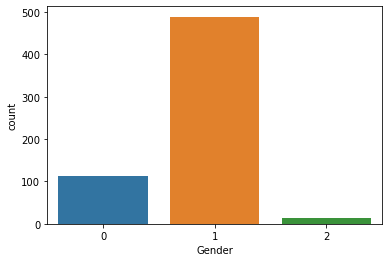

In [74]:
ax=df['Gender'].value_counts()
print(ax)
sns.countplot(df['Gender'])

from the above obserations the total number of male is 489 and female is 112, others are 12

1    398
0    213
2      3
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

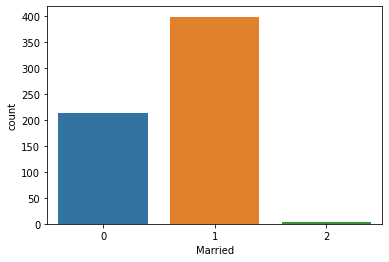

In [75]:
ax=df['Married'].value_counts()
print(ax)
sns.countplot(df['Married'])

from the above obserations the total number of married people are are 398 and unmarried are 213, others are 3

0    345
1    102
2    101
3     51
4     15
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

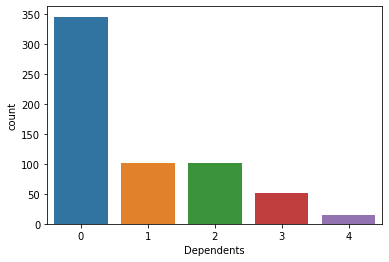

In [76]:
ax=df['Dependents'].value_counts()
print(ax)
sns.countplot(df['Dependents'])

from the above obserations the total number of Dependents people are 
for 0    345
    1    102
    2    101
    3     51
    4     15

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

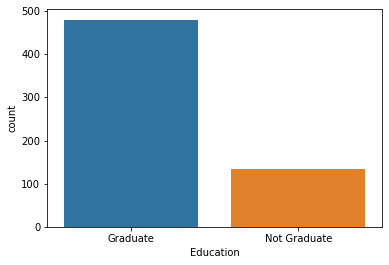

In [77]:
ax=df['Education'].value_counts()
print(ax)
sns.countplot(df['Education'])

from the above obserations the total number of educated people are 

Graduate        480
Not Graduate    134

0    500
1     82
2     32
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

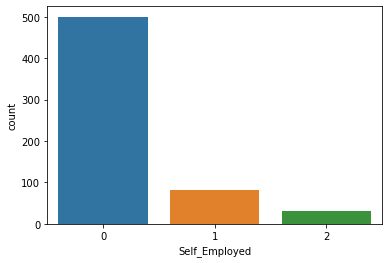

In [78]:
ax=df['Self_Employed'].value_counts()
print(ax)
sns.countplot(df['Self_Employed'])

from the above obserations the total number of Self_Employed people are 

0    500
1     82
2     32

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

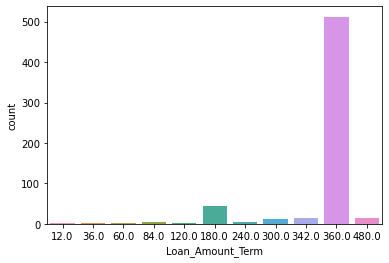

In [79]:
ax=df['Loan_Amount_Term'].value_counts()
print(ax)
sns.countplot(df['Loan_Amount_Term'])

from the above obserations the total number of Loan_Amount_Term people are

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

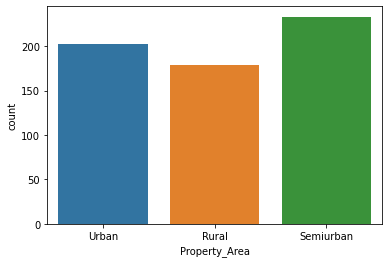

In [80]:
ax=df['Property_Area'].value_counts()
print(ax)
sns.countplot(df['Property_Area'])

from the above obserations the total number of Property areas are

Semiurban    233
Urban        202
Rural        179


Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

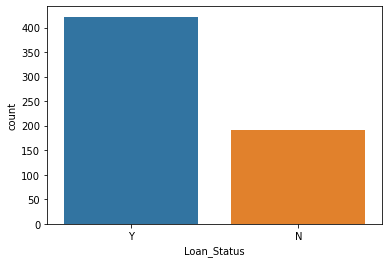

In [81]:
ax=df['Loan_Status'].value_counts()
print(ax)
sns.countplot(df['Loan_Status'])

from the above obserations the total number of Loan_Status are two 

no.of people taken loan-->  422
no.of people who have not taken loan-->    192


In [82]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education             object
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Encoding of Education column

In [88]:
lencoder=LabelEncoder()
df['Education']=lencoder.fit_transform(df['Education'])
df['Property_Area']=lencoder.fit_transform(df['Property_Area'])
df['Loan_Status']=lencoder.fit_transform(df['Loan_Status'])

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


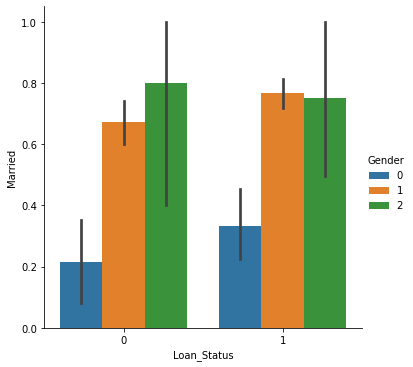

In [89]:
g=sns.catplot(y='Married',x='Loan_Status',hue='Gender',data=df,kind='bar')
plt.show()

From the above plot it shows that Male candidate takes more loan than female candidate.

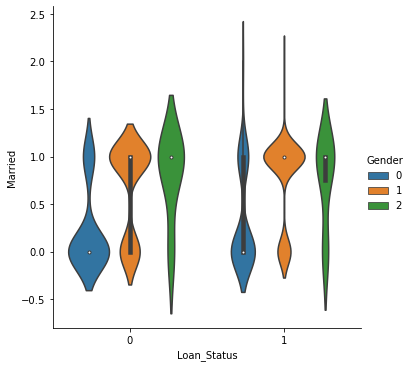

In [90]:
g=sns.catplot(y='Married',x='Loan_Status',hue='Gender',data=df,kind='violin')
plt.show()

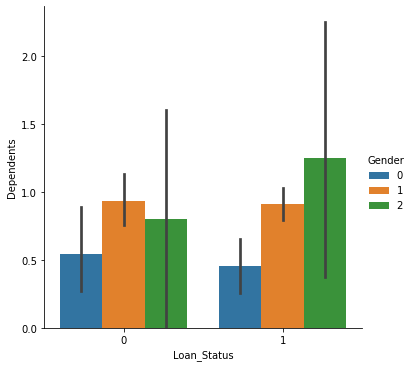

In [92]:
g=sns.catplot(y='Dependents',x='Loan_Status',hue='Gender',data=df,kind='bar')
plt.show()

from the above observation female candidate are more dependant ans has not taken loan while
male candidate are not dependant ans has taken loan.

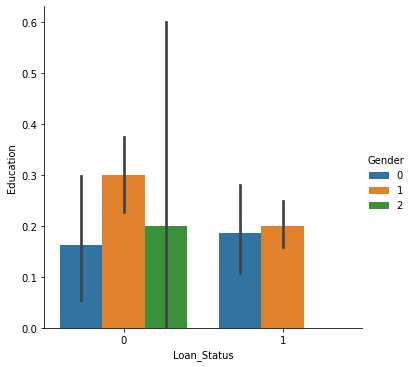

In [93]:
g=sns.catplot(y='Education',x='Loan_Status',hue='Gender',data=df,kind='bar')
plt.show()

from the above observation it observed that female are uneducated person and has not taken loan while
male are educated person and has taken loan

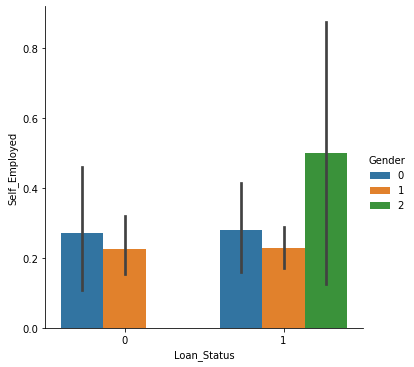

In [94]:
g=sns.catplot(y='Self_Employed',x='Loan_Status',hue='Gender',data=df,kind='bar')
plt.show()

2 class people are more self employed than male and female candidate.

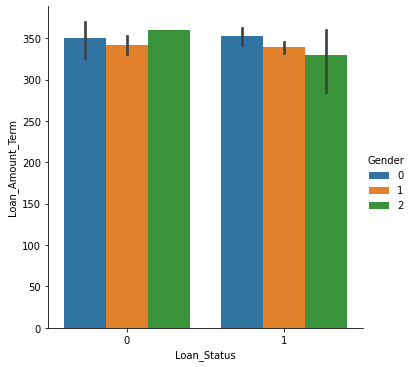

In [95]:
g=sns.catplot(y='Loan_Amount_Term',x='Loan_Status',hue='Gender',data=df,kind='bar')
plt.show()

from above observation it observed that Loan  Amount Term are more in allthe 3 cases.

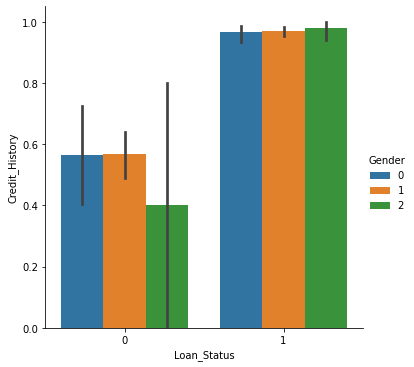

In [96]:
g=sns.catplot(y='Credit_History',x='Loan_Status',hue='Gender',data=df,kind='bar')
plt.show()

from above observation it is observed that people who are has more credit history has taken loan.

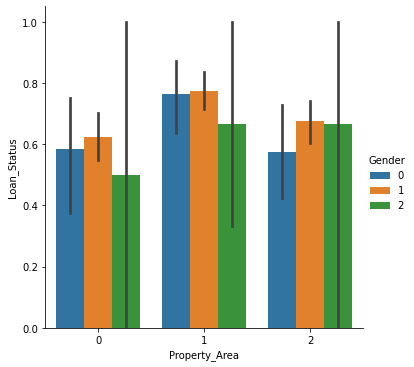

In [98]:
g=sns.catplot(x='Property_Area',y='Loan_Status',hue='Gender',data=df,kind='bar')
plt.show()

urban people are taking more loan than  non-urban people.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

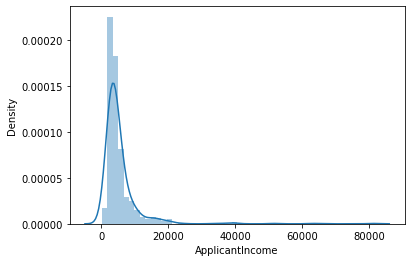

In [99]:
sns.distplot(df['ApplicantIncome'],kde=True)

Applicant Income is more in range from 0 to 20000

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

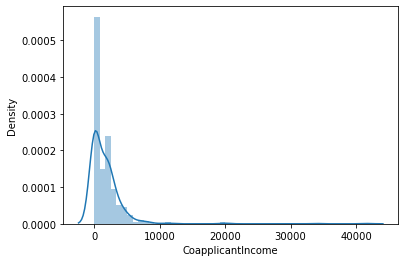

In [100]:
sns.distplot(df['CoapplicantIncome'],kde=True)

Co-applicant Income is more in range from 0 to 10000

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

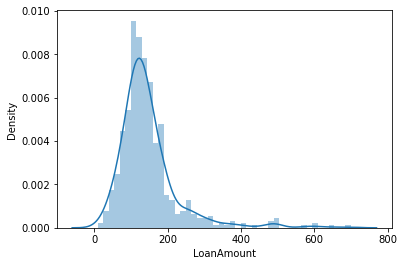

In [101]:
sns.distplot(df['LoanAmount'],kde=True)

Range of LoanAmount is from 0 to 600

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

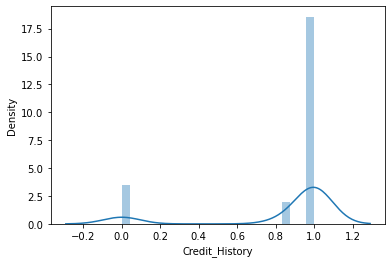

In [102]:
sns.distplot(df['Credit_History'],kde=True)

Credit_History is maximum for 1 and minimum is 0

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

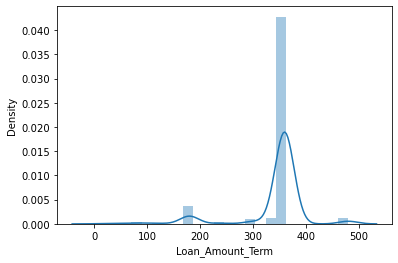

In [103]:
sns.distplot(df['Loan_Amount_Term'],kde=True)

Loan_Amount_Term is maximum at 360

## Describe the dataset

In [104]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

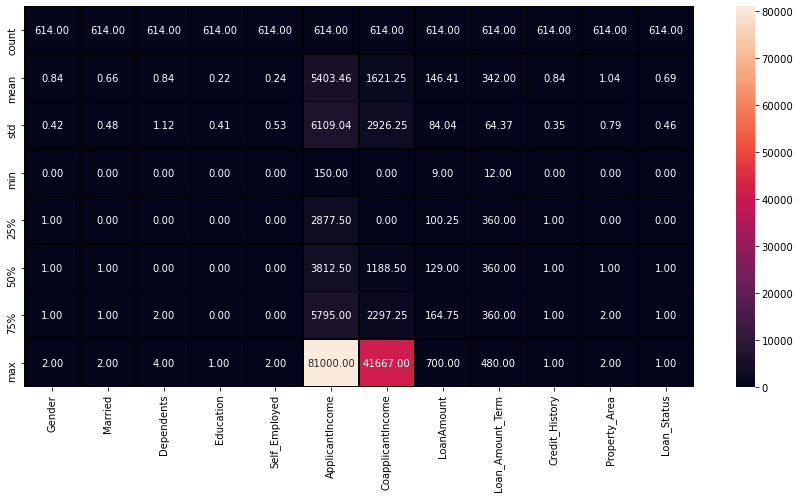

In [105]:
plt.figure(figsize=(15,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


## Correlation of the columns with the target columns

In [106]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.067778,-0.000490,-0.030903,0.008690
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096253,0.010302,0.007973,0.096657
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.130722,-0.073683,-0.077539,0.032600,-0.007318
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036965,0.052701,-0.013439,0.010880
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.136081,0.145541,0.130722,-0.166998,0.089806,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.067778,-0.096253,-0.073683,-0.077242,-0.036965,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,-0.000490,0.010302,-0.077539,-0.077936,0.052701,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


<AxesSubplot:>

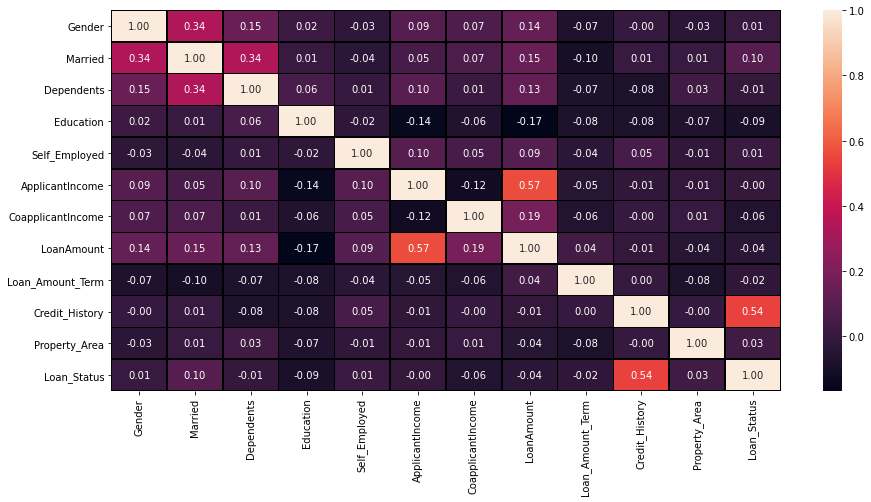

In [107]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


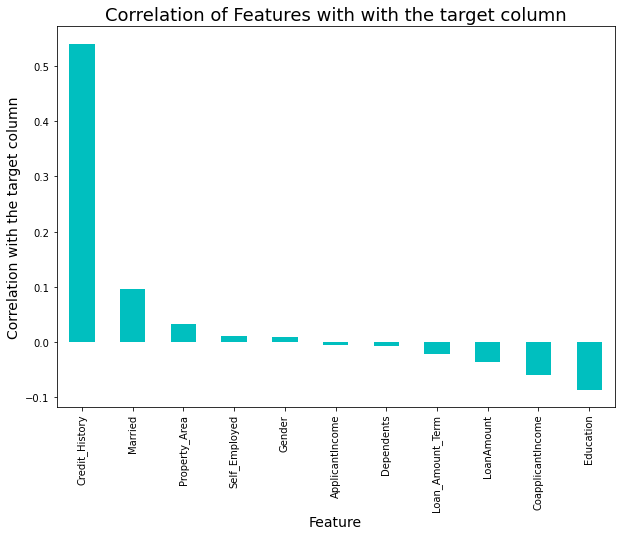

In [108]:
plt.figure(figsize=(10,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


## Now we use subplot and displot to check data are normalised or not.

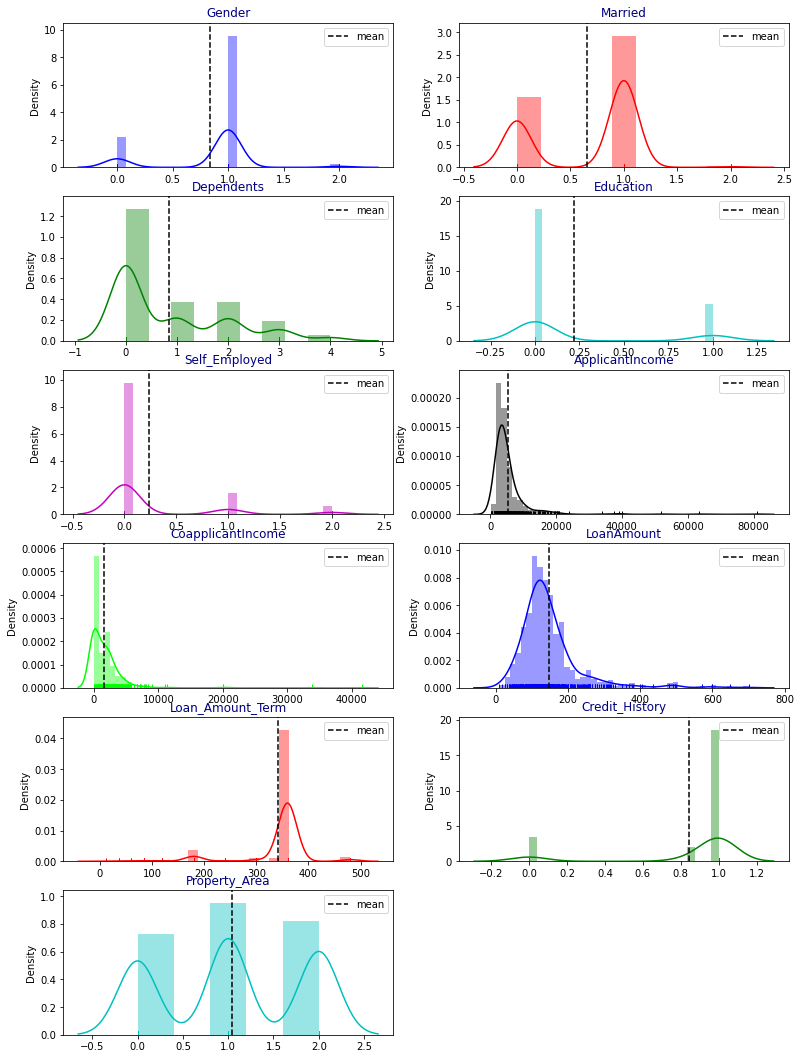

In [110]:
import itertools

cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","b","r","g","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(8,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

In [109]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [111]:
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

From the above observation all the columns falls under high skewness so we have to remove it.

## Outliers Check:

<AxesSubplot:>

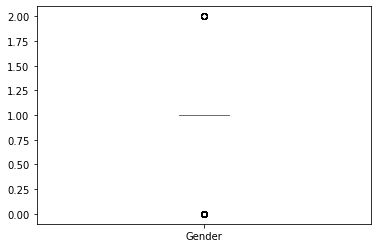

In [112]:
df['Gender'].plot.box()

<AxesSubplot:>

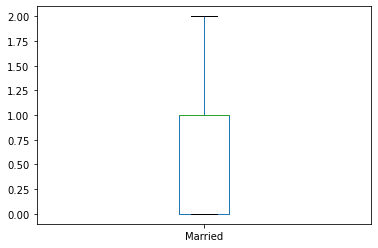

In [113]:
df['Married'].plot.box()

<AxesSubplot:>

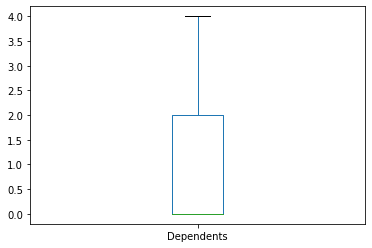

In [114]:
df['Dependents'].plot.box()

<AxesSubplot:>

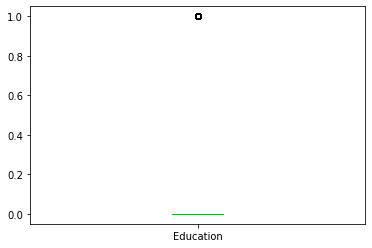

In [115]:
df['Education'].plot.box()

<AxesSubplot:>

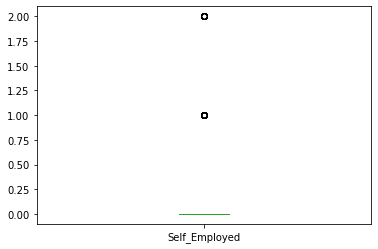

In [116]:
df['Self_Employed'].plot.box()

<AxesSubplot:>

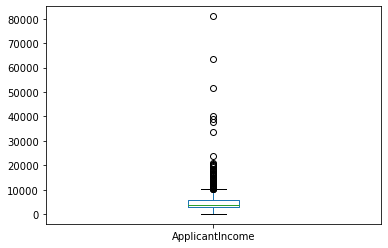

In [117]:
df['ApplicantIncome'].plot.box()

<AxesSubplot:>

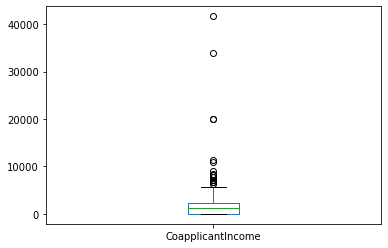

In [118]:
df['CoapplicantIncome'].plot.box()

<AxesSubplot:>

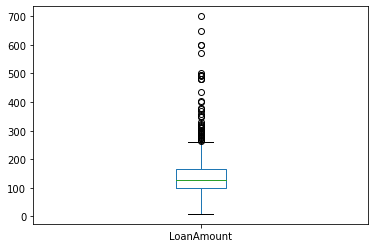

In [119]:
df['LoanAmount'].plot.box()

<AxesSubplot:>

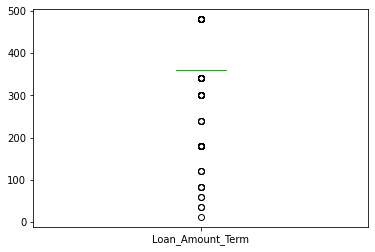

In [120]:
df['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

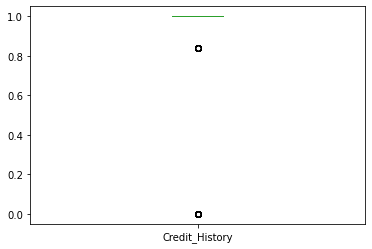

In [121]:
df['Credit_History'].plot.box()

<AxesSubplot:>

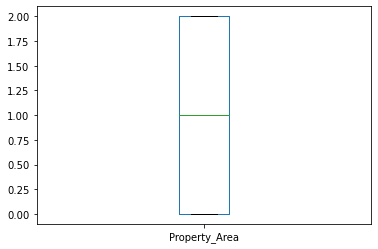

In [122]:
df['Property_Area'].plot.box()

from the above plot it is observed that some outliers are present.

## Outliers Removal

In [123]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114,
        126, 130, 133, 155, 155, 158, 170, 171, 171, 177, 177, 183, 185,
        218, 231, 236, 242, 262, 268, 278, 295, 308, 313, 333, 333, 333,
        336, 344, 369, 374, 380, 385, 402, 409, 411, 417, 432, 432, 443,
        447, 463, 468, 487, 495, 497, 506, 523, 525, 535, 542, 546, 561,
        575, 579, 581, 585, 600, 600, 601, 604], dtype=int64),
 array([6, 4, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 5, 7, 8, 5, 7, 4, 4, 5, 7,
        6, 7, 5, 5, 4, 4, 4, 8, 8, 4, 7, 4, 7, 8, 4, 5, 7, 4, 4, 7, 4, 4,
        4, 6, 5, 4, 6, 4, 7, 5, 4, 4, 4, 7, 8, 8, 7, 7, 7, 4, 4, 8, 7, 8,
        4, 6, 8, 4, 6, 4, 7], dtype=int64))

In [124]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [125]:
df.shape

(614, 12)

## Percentage loss of data

In [126]:
percentage_loss=((614-548)/614)*100
print(percentage_loss)

10.749185667752444


## Sparating the target and feature column

In [127]:
feature=df.drop("Loan_Status",axis=1)
target=df["Loan_Status"]

## Scaling the data using the min max scaler

In [128]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[0.5       , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [0.5       , 0.5       , 0.25      , ..., 0.74358974, 1.        ,
        0.        ],
       [0.5       , 0.5       , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [0.5       , 0.5       , 0.25      , ..., 0.74358974, 1.        ,
        1.        ],
       [0.5       , 0.5       , 0.5       , ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        0.5       ]])

In [129]:
y=target
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

## Logistic Regression

In [130]:
lr=LogisticRegression()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    lr.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training accuracy_score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-",accuracy_score(y_test,pred_test)*100)

At random state 78 The model performs very well
At random state:- 78
Training accuracy_score is:- 81.26272912423626
Testing accuracy_score is:- 81.30081300813008


In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=0.20)

In [132]:
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[ 5 29]
 [ 8 81]]
              precision    recall  f1-score   support

           0       0.38      0.15      0.21        34
           1       0.74      0.91      0.81        89

    accuracy                           0.70       123
   macro avg       0.56      0.53      0.51       123
weighted avg       0.64      0.70      0.65       123



## Cross validation for logistic regression

In [133]:
from sklearn.model_selection import cross_val_score
pred_lr = lr.predict(x_test)

lrcs= accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lrscore = cross_val_score(lr,x,y,cv=j)
    lrc = lrscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lrc*100 )
    print("accuracy_score is :-",lrcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 80.94462540716613
accuracy_score is :- 81.30081300813008


At cv:- 3
Cross validation score is:- 80.94850948509486
accuracy_score is :- 81.30081300813008


At cv:- 4
Cross validation score is:- 80.95025889143535
accuracy_score is :- 81.30081300813008


At cv:- 5
Cross validation score is:- 80.78368652538984
accuracy_score is :- 81.30081300813008


At cv:- 6
Cross validation score is:- 80.78558284155085
accuracy_score is :- 81.30081300813008


At cv:- 7
Cross validation score is:- 80.78817733990148
accuracy_score is :- 81.30081300813008


At cv:- 8
Cross validation score is:- 80.95095693779905
accuracy_score is :- 81.30081300813008


At cv:- 9
Cross validation score is:- 80.9462915601023
accuracy_score is :- 81.30081300813008




In [134]:
print("At cv:-",4)
print("Cross validation score is:-",80.950 )
print("Accuracy_score is :-",81.300)



At cv:- 4
Cross validation score is:- 80.95
Accuracy_score is :- 81.3


## AUC-ROC curve

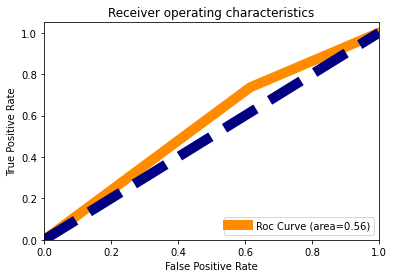

In [135]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [136]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
auc_score

0.6890284203569068

## Classification model buliding

In [137]:
mnb=MultinomialNB()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    mnb.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=mnb.predict(x_train)
    pred_test=mnb.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 709 The model performs very well
At random state:- 709
Training score is:- 70.67209775967413
Testing score is:- 70.73170731707317


In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=709,test_size=0.20)

In [139]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred_test=mnb.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7073170731707317
[[ 2 36]
 [ 0 85]]
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        38
           1       0.70      1.00      0.83        85

    accuracy                           0.71       123
   macro avg       0.85      0.53      0.46       123
weighted avg       0.79      0.71      0.60       123



## Cross-validation for MultinomialNB

In [140]:
from sklearn.model_selection import cross_val_score
pred_mnb = mnb.predict(x_test)

mnbcs= accuracy_score(y_test,pred_mnb)
for j in range(2,10):
    mnbscore = cross_val_score(mnb,x,y,cv=j)
    mnbc = mnbscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",mnbc*100 )
    print("accuracy_score is :-",mnbcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 68.89250814332247
accuracy_score is :- 70.73170731707317


At cv:- 3
Cross validation score is:- 68.89207715606567
accuracy_score is :- 70.73170731707317


At cv:- 4
Cross validation score is:- 68.7293099057805
accuracy_score is :- 70.73170731707317


At cv:- 5
Cross validation score is:- 68.72984139677463
accuracy_score is :- 70.73170731707317


At cv:- 6
Cross validation score is:- 68.72898026524527
accuracy_score is :- 70.73170731707317


At cv:- 7
Cross validation score is:- 68.89461113599046
accuracy_score is :- 70.73170731707317


At cv:- 8
Cross validation score is:- 68.89311346548187
accuracy_score is :- 70.73170731707317


At cv:- 9
Cross validation score is:- 68.89504594108176
accuracy_score is :- 70.73170731707317




In [141]:

print("At cv:-",3)
print("Cross validation score is:-",68.892 )
print("Accuracy_score is :-",70.731)

At cv:- 3
Cross validation score is:- 68.892
Accuracy_score is :- 70.731


## Auc Roc Curve

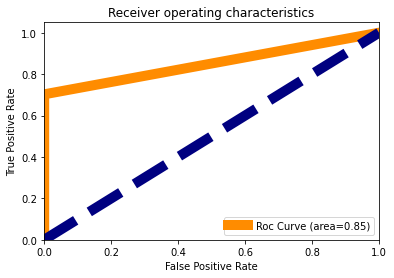

In [142]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [143]:
svc=SVC(kernel='rbf')
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 160 The model performs very well
At random state:- 160
Training score is:- 81.26272912423626
Testing score is:- 81.30081300813008
At random state 283 The model performs very well
At random state:- 283
Training score is:- 81.26272912423626
Testing score is:- 81.30081300813008
At random state 878 The model performs very well
At random state:- 878
Training score is:- 81.26272912423626
Testing score is:- 81.30081300813008
At random state 966 The model performs very well
At random state:- 966
Training score is:- 81.26272912423626
Testing score is:- 81.30081300813008


In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=160,test_size=0.20)

In [177]:
def svmkernel(ker):
    svc=SVC(kernel=ker)  
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred_test=svc.predict(x_test)
    print(accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))


In [178]:
svmkernel('rbf')

0.8130081300813008
[[17 21]
 [ 2 83]]
              precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.80      0.98      0.88        85

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123



## Cross-validation for SVM for rbf kernel

In [147]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 80.78175895765473
accuracy_score is :- 81.30081300813008


At cv:- 3
Cross validation score is:- 80.94850948509486
accuracy_score is :- 81.30081300813008


At cv:- 4
Cross validation score is:- 80.95025889143535
accuracy_score is :- 81.30081300813008


At cv:- 5
Cross validation score is:- 80.9462881514061
accuracy_score is :- 81.30081300813008


At cv:- 6
Cross validation score is:- 80.94739513928548
accuracy_score is :- 81.30081300813008


At cv:- 7
Cross validation score is:- 80.95051500223914
accuracy_score is :- 81.30081300813008


At cv:- 8
Cross validation score is:- 80.95095693779905
accuracy_score is :- 81.30081300813008


At cv:- 9
Cross validation score is:- 80.9462915601023
accuracy_score is :- 81.30081300813008




In [148]:

print("At cv:-",4)
print("Cross validation score is:-",81.950)
print("Accuracy_score is :-",81.300)

At cv:- 4
Cross validation score is:- 81.95
Accuracy_score is :- 81.3


In [150]:
svc=SVC(kernel='linear')
for i in range(1,2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.20)
print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.6374745417515275
0.6341463414634146
[[10 36]
 [ 9 68]]
              precision    recall  f1-score   support

           0       0.53      0.22      0.31        46
           1       0.65      0.88      0.75        77

    accuracy                           0.63       123
   macro avg       0.59      0.55      0.53       123
weighted avg       0.61      0.63      0.59       123



## Cross-validation for SVM for linear kernel

In [152]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 80.94462540716613
accuracy_score is :- 77.23577235772358


At cv:- 3
Cross validation score is:- 80.94850948509486
accuracy_score is :- 77.23577235772358


At cv:- 4
Cross validation score is:- 80.95025889143535
accuracy_score is :- 77.23577235772358


At cv:- 5
Cross validation score is:- 80.9462881514061
accuracy_score is :- 77.23577235772358


At cv:- 6
Cross validation score is:- 80.94739513928548
accuracy_score is :- 77.23577235772358


At cv:- 7
Cross validation score is:- 80.95051500223914
accuracy_score is :- 77.23577235772358


At cv:- 8
Cross validation score is:- 80.95095693779905
accuracy_score is :- 77.23577235772358


At cv:- 9
Cross validation score is:- 80.9462915601023
accuracy_score is :- 77.23577235772358




In [153]:

print("At cv:-",4)
print("Cross validation score is:-",80.950)
print("Accuracy_score is :-", 77.235)

At cv:- 4
Cross validation score is:- 80.95
Accuracy_score is :- 77.235


In [155]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [159]:
svcr = SVC(C=1, kernel='rbf')
svcr.fit(x_train,y_train)
svcr.score(x_train,y_train)
pred_svcr = svcr.predict(x_test)

svcsr = accuracy_score(y_test,pred_svcr)
print('Accuracy Score:',svcsr*100)

svcrscore = cross_val_score(svcr,x,y,cv=3)
svccr = svcrscore.mean() 
print('Cross Val Score:',svccr*100)

Accuracy Score: 77.23577235772358
Cross Val Score: 80.94850948509486


# Auc roc curve for SVM with 'linear' kernel

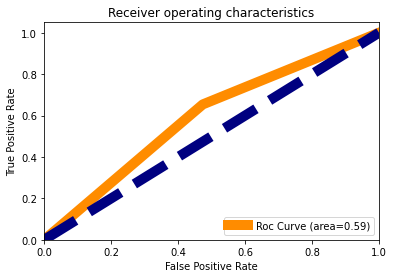

In [160]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [161]:
dtc=DecisionTreeClassifier()
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [162]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=0.20)

In [163]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)

dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7235772357723578
1.0
[[21 15]
 [19 68]]
              precision    recall  f1-score   support

           0       0.53      0.58      0.55        36
           1       0.82      0.78      0.80        87

    accuracy                           0.72       123
   macro avg       0.67      0.68      0.68       123
weighted avg       0.73      0.72      0.73       123



Here the model is overfitting as training accuracy is greater than testing accuracy.

Cross validation of DTC model

In [164]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
dtccs= accuracy_score(y_test,pred_test)
for j in range(2,10):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    dtcc = dtcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",dtccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 71.00977198697068
accuracy_score is :- 72.35772357723577


At cv:- 3
Cross validation score is:- 68.89287422285987
accuracy_score is :- 72.35772357723577


At cv:- 4
Cross validation score is:- 71.17710720651897
accuracy_score is :- 72.35772357723577


At cv:- 5
Cross validation score is:- 72.31507397041183
accuracy_score is :- 72.35772357723577


At cv:- 6
Cross validation score is:- 73.12012183514183
accuracy_score is :- 72.35772357723577


At cv:- 7
Cross validation score is:- 71.98835647111508
accuracy_score is :- 72.35772357723577


At cv:- 8
Cross validation score is:- 72.15695488721805
accuracy_score is :- 72.35772357723577


At cv:- 9
Cross validation score is:- 71.31997726626884
accuracy_score is :- 72.35772357723577




In [165]:
print("At cv:-",5)
print("Cross validation score is:-",72.315)
print("Accuracy_score is :-", 72.357)


At cv:- 5
Cross validation score is:- 72.315
Accuracy_score is :- 72.357


In [166]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier() 
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(dtc, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
DecisionTreeClassifier(max_depth=1)
Best parameters are:  {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy score:  0.8023457283753165


In [167]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 81 The model performs very well
At random state:- 81
Training score is:- 81.26272912423626
Testing score is:- 81.30081300813008
At random state 238 The model performs very well
At random state:- 238
Training score is:- 82.07739307535643
Testing score is:- 82.11382113821138
At random state 245 The model performs very well
At random state:- 245
Training score is:- 81.26272912423626
Testing score is:- 81.30081300813008
At random state 356 The model performs very well
At random state:- 356
Training score is:- 82.07739307535643
Testing score is:- 82.11382113821138
At random state 359 The model performs very well
At random state:- 359
Training score is:- 81.26272912423626
Testing score is:- 81.30081300813008
At random state 438 The model performs very well
At random state:- 438
Training score is:- 81.26272912423626
Testing score is:- 81.30081300813008
At random state 477 The model performs very well
At random state:- 477
Training score is:- 81.26272912423626
Testing score is:

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=238,test_size=0.20)

In [169]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8211382113821138
[[11 21]
 [ 1 90]]
              precision    recall  f1-score   support

           0       0.92      0.34      0.50        32
           1       0.81      0.99      0.89        91

    accuracy                           0.82       123
   macro avg       0.86      0.67      0.70       123
weighted avg       0.84      0.82      0.79       123



In [170]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
knncs= accuracy_score(y_test,pred_knn)
for j in range(2,10):
    knnscore = cross_val_score(knn,x,y,cv=j)
    knnc = knnscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",knnc*100 )
    print("accuracy_score is :-",knncs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 78.99022801302932
accuracy_score is :- 82.11382113821138


At cv:- 3
Cross validation score is:- 78.33731866730432
accuracy_score is :- 82.11382113821138


At cv:- 4
Cross validation score is:- 78.17778626602156
accuracy_score is :- 82.11382113821138


At cv:- 5
Cross validation score is:- 78.50459816073571
accuracy_score is :- 82.11382113821138


At cv:- 6
Cross validation score is:- 78.50434672250776
accuracy_score is :- 82.11382113821138


At cv:- 7
Cross validation score is:- 79.31967457829528
accuracy_score is :- 82.11382113821138


At cv:- 8
Cross validation score is:- 78.50734791524265
accuracy_score is :- 82.11382113821138


At cv:- 9
Cross validation score is:- 78.82684474756086
accuracy_score is :- 82.11382113821138




In [171]:

print("At cv:-",2)
print("Cross validation score is:-",78.990)
print("Accuracy_score is :-", 82.113)

At cv:- 2
Cross validation score is:- 78.99
Accuracy_score is :- 82.113


In [172]:
from sklearn.metrics import f1_score
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='macro')
knn_f1=f1_score(y_true, pred_knn, average='macro')
svcr_f1=f1_score(y_true, pred_svcr, average='macro')
mnb_f1=f1_score(y_true, pred_mnb, average='macro')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)
print("mnb f1 score",mnb_f1)

dtc f1 score 0.6955445544554455
knn f1 score 0.6955445544554455
svcr f1 score 0.5491898148148149
mnb f1 score 0.41981132075471694


In [173]:
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='weighted')
knn_f1=f1_score(y_true, pred_knn, average='weighted')
svcr_f1=f1_score(y_true, pred_svcr, average='weighted')
mnb_f1=f1_score(y_true, pred_mnb, average='weighted')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)
print("mnb f1 score",mnb_f1)

dtc f1 score 0.7893423488690332
knn f1 score 0.7893423488690332
svcr f1 score 0.6704964619090636
mnb f1 score 0.6211842307102317


## The best model is SVM classifier with rbf kernel. Since the difference between the percentage score of cross validation and accuracy_score is optimum and f1 score is also good in all other model.

Cross validation score is:- 81.95

Accuracy_score is :- 81.3



## Model Saving

In [184]:
import pickle
filename = 'inhouse_loan_prediction.pkl'
pickle.dump(svcr, open(filename, 'wb'))

## Conclusion

In [181]:
import numpy as np
a=np.array(y_test)
a

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [183]:
predicted=np.array(svcr.predict(x_test))
predicted

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [185]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,1,1
1,0,1
2,0,0
3,1,1
4,0,1
...,...,...
118,1,1
119,1,1
120,1,1
121,1,1


# From the above table the model is predicted the values with 80 percent accuracy
​